# 7章　線形回帰

In [1]:
# 必要ライブラリの宣言
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# PDF出力用
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [3]:
from sklearn.datasets import load_boston
# 学習用データ準備
boston = load_boston()
x_org, yt = boston.data, boston.target
feature_names = boston.feature_names
print('元データ', x_org.shape, yt.shape)
print('項目名: ', feature_names)

# データ絞り込み (項目 RMのみ)
x_data = x_org[:,feature_names == 'RM']
print('絞り込み後', x_data.shape)

# ダミー変数を追加
x = np.insert(x_data, 0, 1.0, axis=1)
print('ダミー変数追加後', x.shape)

元データ (506, 13) (506,)
項目名:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
絞り込み後 (506, 1)
ダミー変数追加後 (506, 2)


In [6]:
# 入力データxの表示 (ダミー変数を含む)
print(x.shape)
print(x[:5,:])

(506, 2)
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]


In [7]:
# 正解データ yの表示
print(yt[:5])

[24.  21.6 34.7 33.4 36.2]


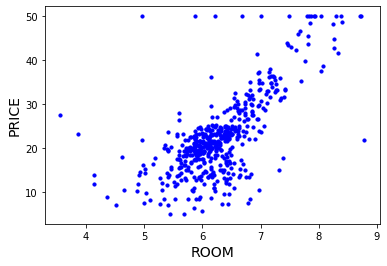

In [8]:
# 散布図の表示
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.show()

In [9]:
# 予測関数 (1, x)の値から予測値ypを計算する
def pred(x, w):
    return(x @ w)

In [15]:
# 初期化処理

# データ系列総数
M  = x.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x.shape[1]

# 繰り返し回数
iters = 50000

# 学習率
alpha = 0.01

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [16]:
# 繰り返しループ
for k in range(iters):
    
    # 予測値の計算 (7.8.1)
    yp = pred(x, w)
    
    # 誤差の計算 (7.8.2)
    yd = yp - yt
    
    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x.T @ yd) / M
    
    # 学習曲線描画用データの計算、保存
    if ( k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss))    

iter = 0  loss = 154.224934
iter = 100  loss = 29.617518
iter = 200  loss = 29.431766
iter = 300  loss = 29.250428
iter = 400  loss = 29.073399
iter = 500  loss = 28.900577
iter = 600  loss = 28.731861
iter = 700  loss = 28.567154
iter = 800  loss = 28.406360
iter = 900  loss = 28.249388
iter = 1000  loss = 28.096145
iter = 1100  loss = 27.946544
iter = 1200  loss = 27.800498
iter = 1300  loss = 27.657922
iter = 1400  loss = 27.518733
iter = 1500  loss = 27.382852
iter = 1600  loss = 27.250200
iter = 1700  loss = 27.120700
iter = 1800  loss = 26.994277
iter = 1900  loss = 26.870858
iter = 2000  loss = 26.750372
iter = 2100  loss = 26.632749
iter = 2200  loss = 26.517921
iter = 2300  loss = 26.405821
iter = 2400  loss = 26.296385
iter = 2500  loss = 26.189549
iter = 2600  loss = 26.085252
iter = 2700  loss = 25.983433
iter = 2800  loss = 25.884034
iter = 2900  loss = 25.786997
iter = 3000  loss = 25.692265
iter = 3100  loss = 25.599784
iter = 3200  loss = 25.509501
iter = 3300  loss = 2

iter = 33900  loss = 21.802582
iter = 34000  loss = 21.802527
iter = 34100  loss = 21.802474
iter = 34200  loss = 21.802422
iter = 34300  loss = 21.802371
iter = 34400  loss = 21.802321
iter = 34500  loss = 21.802272
iter = 34600  loss = 21.802225
iter = 34700  loss = 21.802179
iter = 34800  loss = 21.802133
iter = 34900  loss = 21.802089
iter = 35000  loss = 21.802046
iter = 35100  loss = 21.802004
iter = 35200  loss = 21.801963
iter = 35300  loss = 21.801923
iter = 35400  loss = 21.801884
iter = 35500  loss = 21.801846
iter = 35600  loss = 21.801808
iter = 35700  loss = 21.801772
iter = 35800  loss = 21.801736
iter = 35900  loss = 21.801702
iter = 36000  loss = 21.801668
iter = 36100  loss = 21.801635
iter = 36200  loss = 21.801602
iter = 36300  loss = 21.801571
iter = 36400  loss = 21.801540
iter = 36500  loss = 21.801510
iter = 36600  loss = 21.801481
iter = 36700  loss = 21.801452
iter = 36800  loss = 21.801424
iter = 36900  loss = 21.801397
iter = 37000  loss = 21.801370
iter = 3

In [17]:
# 最終的な損失関数初期値、最終値
print('損失関数初期値: %f' % history[0,1])
print('損失関数最終値: %f' % history[-1,1])

損失関数初期値: 154.224934
損失関数最終値: 21.800325


In [18]:
# 下記直線描画用の座標値計算
xall = x[:,1].ravel()
xl = np.array([[1, xall.min()],[1, xall.max()]])
yl = pred(xl, w)

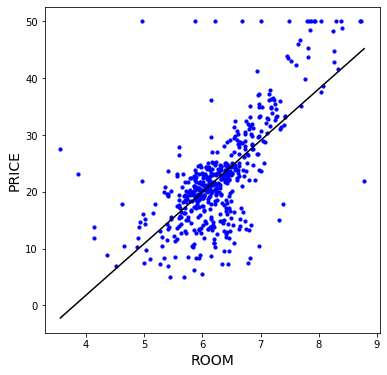

In [19]:
# 散布図と回帰直線の描画
plt.figure(figsize=(6,6))
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.plot(xl[:,1], yl, c='k')
plt.show()

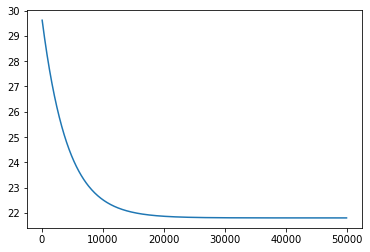

In [20]:
# 学習曲線の表示 (最初の1個分を除く)
plt.plot(history[1:,0], history[1:,1])
plt.show()

## 7.10  重回帰モデルへの拡張

In [21]:
# 列(LSTAT: 低所得者率)の追加
x_add = x_org[:,feature_names == 'LSTAT']
x2 = np.hstack((x, x_add))
print(x2.shape)

(506, 3)


In [22]:
# 入力データxの表示 (ダミーデータを含む)
print(x2[:5,:])

[[1.    6.575 4.98 ]
 [1.    6.421 9.14 ]
 [1.    7.185 4.03 ]
 [1.    6.998 2.94 ]
 [1.    7.147 5.33 ]]


In [23]:
# 初期化処理

# データ系列総数
M  = x2.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x2.shape[1]

# 繰り返し回数
iters = 50000

# 学習率
alpha = 0.01

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [24]:
# 繰り返しループ
for k in range(iters):
    
    # 予測値の計算 (7.8.1)
    yp = pred(x2, w)
    
    # 誤差の計算 (7.8.2)
    yd = yp - yt
    
    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x2.T @ yd) / M
    
    # 学習曲線描画用データの計算、保存
    if ( k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss))    

iter = 0  loss = 112.063982
iter = 100  loss = 3753823486849646657661191585792.000000
iter = 200  loss = 2655334090092121273125402130921363327346591043573060835737600.000000
iter = 300  loss = 1878297995285461085045523284196482247086583201277085616612002646578050704876245186403893248.000000
iter = 400  loss = 1328647635059370371481703736763320157491450137821164352493234234699501961915925811873201177774480485596734461998977253376.000000
iter = 500  loss = 939842635502889662770612459069204655322935013749983559305346547831066121187997098891801614859352058834834127179648062098892108735689096962423654449152.000000
iter = 600  loss = 664814474659069633326225154456281621437843401089919849984802605951952813450932070104832955931408232444704376327323598259772619705292304255008658261182054817148272715437536805126144.000000
iter = 700  loss = 4702683928354890122336859725898191832282143720139237825330730669746867864949239124735902657924806487243589542826018357625164953426808618327631873381924793161

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in matmul
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()



iter = 11600  loss = nan
iter = 11700  loss = nan
iter = 11800  loss = nan
iter = 11900  loss = nan
iter = 12000  loss = nan
iter = 12100  loss = nan
iter = 12200  loss = nan
iter = 12300  loss = nan
iter = 12400  loss = nan
iter = 12500  loss = nan
iter = 12600  loss = nan
iter = 12700  loss = nan
iter = 12800  loss = nan
iter = 12900  loss = nan
iter = 13000  loss = nan
iter = 13100  loss = nan
iter = 13200  loss = nan
iter = 13300  loss = nan
iter = 13400  loss = nan
iter = 13500  loss = nan
iter = 13600  loss = nan
iter = 13700  loss = nan
iter = 13800  loss = nan
iter = 13900  loss = nan
iter = 14000  loss = nan
iter = 14100  loss = nan
iter = 14200  loss = nan
iter = 14300  loss = nan
iter = 14400  loss = nan
iter = 14500  loss = nan
iter = 14600  loss = nan
iter = 14700  loss = nan
iter = 14800  loss = nan
iter = 14900  loss = nan
iter = 15000  loss = nan
iter = 15100  loss = nan
iter = 15200  loss = nan
iter = 15300  loss = nan
iter = 15400  loss = nan
iter = 15500  loss = nan

iter = 46300  loss = nan
iter = 46400  loss = nan
iter = 46500  loss = nan
iter = 46600  loss = nan
iter = 46700  loss = nan
iter = 46800  loss = nan
iter = 46900  loss = nan
iter = 47000  loss = nan
iter = 47100  loss = nan
iter = 47200  loss = nan
iter = 47300  loss = nan
iter = 47400  loss = nan
iter = 47500  loss = nan
iter = 47600  loss = nan
iter = 47700  loss = nan
iter = 47800  loss = nan
iter = 47900  loss = nan
iter = 48000  loss = nan
iter = 48100  loss = nan
iter = 48200  loss = nan
iter = 48300  loss = nan
iter = 48400  loss = nan
iter = 48500  loss = nan
iter = 48600  loss = nan
iter = 48700  loss = nan
iter = 48800  loss = nan
iter = 48900  loss = nan
iter = 49000  loss = nan
iter = 49100  loss = nan
iter = 49200  loss = nan
iter = 49300  loss = nan
iter = 49400  loss = nan
iter = 49500  loss = nan
iter = 49600  loss = nan
iter = 49700  loss = nan
iter = 49800  loss = nan
iter = 49900  loss = nan


In [38]:
# 初期化処理 (パラメータを適切な値に変更)

# データ系列総数
M  = x2.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x2.shape[1]

# 繰り返し回数
#iters = 50000
iters = 2000

# 学習率
#alpha = 0.0001
alpha = 0.0001

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [39]:
# 繰り返しループ
for k in range(iters):
    
    # 予測値の計算 (7.8.1)
    yp = pred(x2, w)
    
    # 誤差の計算 (7.8.2)
    yd = yp - yt
    
    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x2.T @ yd) / M
    
    # 学習曲線描画用データの計算、保存
    if ( k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss))    

iter = 0  loss = 112.063982
iter = 100  loss = 88.770927
iter = 200  loss = 74.256624
iter = 300  loss = 62.634402
iter = 400  loss = 53.302735
iter = 500  loss = 45.809998
iter = 600  loss = 39.793803
iter = 700  loss = 34.963179
iter = 800  loss = 31.084493
iter = 900  loss = 27.970153
iter = 1000  loss = 25.469534
iter = 1100  loss = 23.461695
iter = 1200  loss = 21.849527
iter = 1300  loss = 20.555057
iter = 1400  loss = 19.515679
iter = 1500  loss = 18.681124
iter = 1600  loss = 18.011028
iter = 1700  loss = 17.472983
iter = 1800  loss = 17.040967
iter = 1900  loss = 16.694084


In [40]:
# 最終的な損失関数初期値、最終値
print('損失関数初期値: %f' % history[0,1])
print('損失関数最終値: %f' % history[-1,1])

損失関数初期値: 112.063982
損失関数最終値: 16.694084


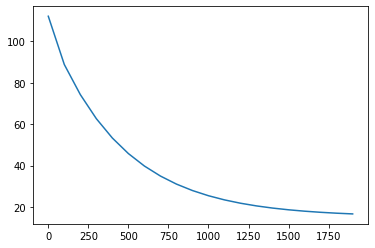

In [41]:
# 学習曲線の表示 (最初の10個分を除く)
plt.plot(history[:,0], history[:,1])
plt.show()